<a href="https://colab.research.google.com/github/Dhanushtadisetti/Infosys_Fraud_Detection_Systems/blob/main/Hotel_Tip_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = ('/content/sample_data/Hotel_Tips_Data.csv')
data = pd.read_csv(file_path)
data.head()
print("\n\n")
print(data.info())
print("\n\n")
print(data.isnull().sum())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hotel_Name       1000 non-null   object 
 1   Visits           1000 non-null   int64  
 2   Tips             1000 non-null   int64  
 3   Tip_Giver        1000 non-null   object 
 4   Room_Type        1000 non-null   object 
 5   Stay_Duration    1000 non-null   int64  
 6   Customer_Rating  1000 non-null   float64
 7   Time             1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB
None



Hotel_Name         0
Visits             0
Tips               0
Tip_Giver          0
Room_Type          0
Stay_Duration      0
Customer_Rating    0
Time               0
dtype: int64


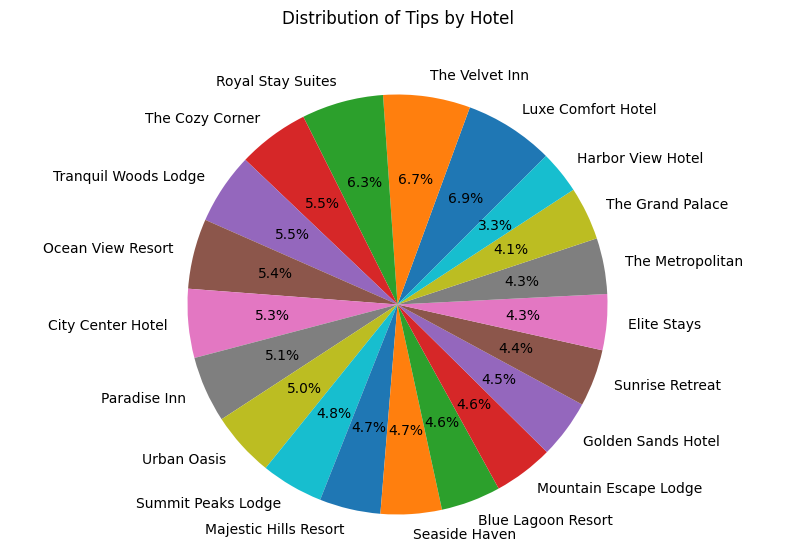

In [ ]:
import matplotlib.pyplot as plt
tips_by_hotel = data['Hotel_Name'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(tips_by_hotel, labels=tips_by_hotel.index, autopct='%1.1f%%', startangle=45)
plt.title('Distribution of Tips by Hotel\n\n')
plt.axis('equal')
plt.show()

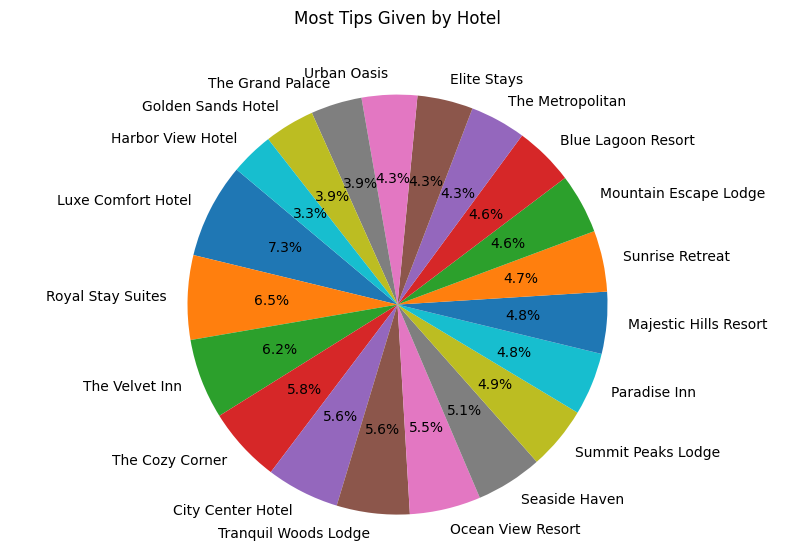

In [ ]:
most_tips_by_hotel = data.groupby('Hotel_Name')['Tips'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.pie(most_tips_by_hotel, labels=most_tips_by_hotel.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Tips Given by Hotel\n\n')
plt.axis('equal')
plt.show()

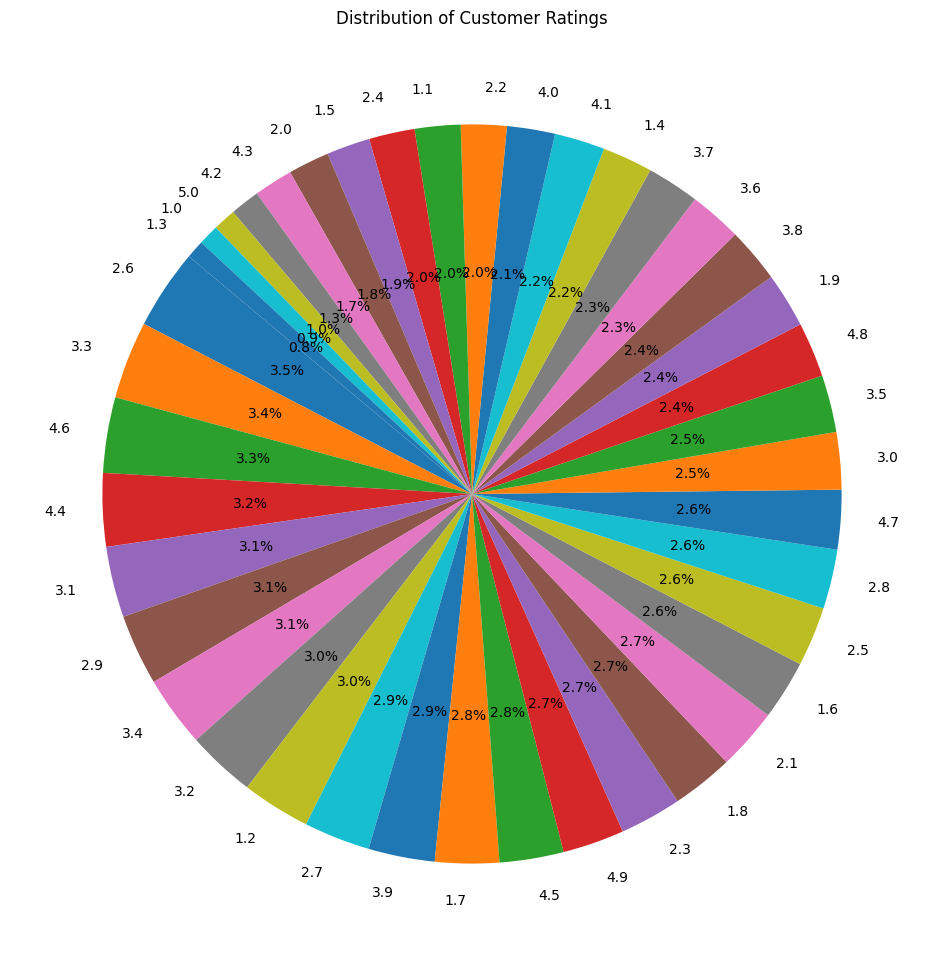

In [ ]:
rating_counts = data['Customer_Rating'].value_counts()
plt.figure(figsize=(20, 12))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Ratings')
plt.show()

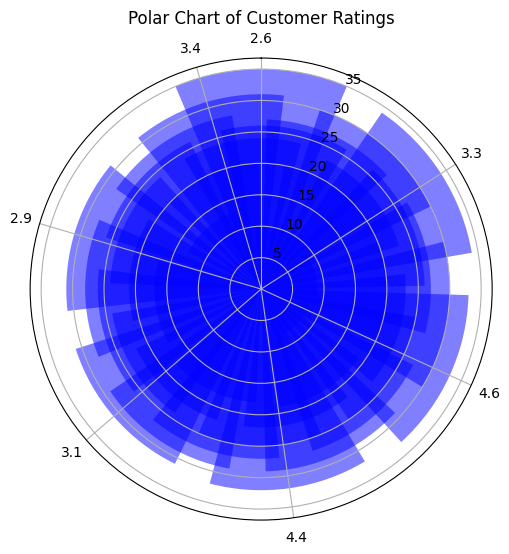

In [ ]:
theta = rating_counts.index.astype(str)
r = rating_counts.values

plt.figure(figsize=(10, 6))
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.bar(theta, r, color='b', alpha=0.5)
ax.set_title('Polar Chart of Customer Ratings')
plt.show()

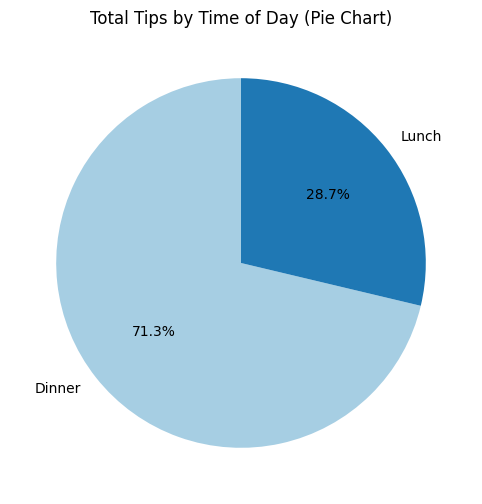

In [ ]:
import matplotlib.pyplot as plt
tips_by_time = data.groupby('Time')['Tips'].sum()
plt.figure(figsize=(8, 6))
tips_by_time.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Total Tips by Time of Day (Pie Chart)")
plt.ylabel("")
plt.show()

<Figure size 800x600 with 0 Axes>

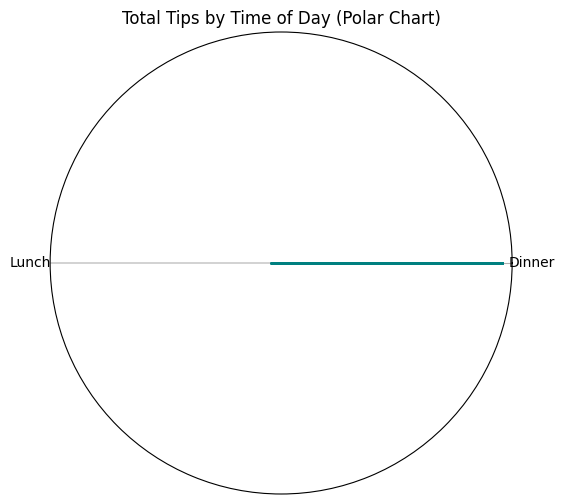

In [ ]:
plt.figure(figsize=(8, 6))
angles = [n / float(len(tips_by_time)) * 2 * 3.14159 for n in range(len(tips_by_time))]
angles += angles[:1]
values = list(tips_by_time) + [list(tips_by_time)[0]]
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})
ax.fill(angles, values, color='teal', alpha=0.3)
ax.plot(angles, values, color='teal', linewidth=2)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(tips_by_time.index)
plt.title("Total Tips by Time of Day (Polar Chart)")
plt.show()


<Figure size 800x600 with 0 Axes>

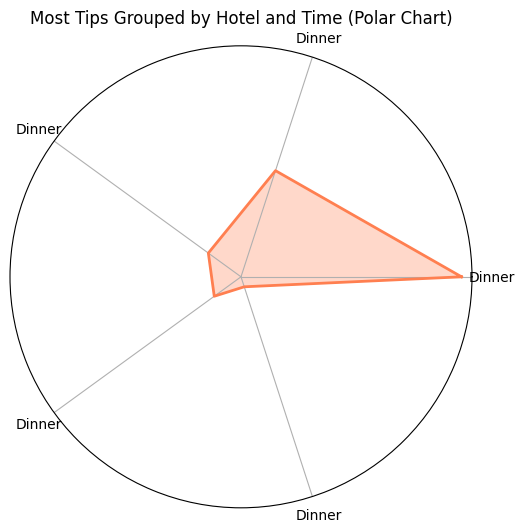

In [ ]:
tips_by_hotel_time = data.groupby(['Hotel_Name', 'Time'])['Tips'].sum().reset_index()
top_hotel_tips = tips_by_hotel_time.sort_values('Tips', ascending=False).head(5)
plt.figure(figsize=(8, 6))
angles = [n / float(len(top_hotel_tips)) * 2 * 3.14159 for n in range(len(top_hotel_tips))]
angles += angles[:1]
values = list(top_hotel_tips['Tips']) + [top_hotel_tips['Tips'].iloc[0]]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})
ax.fill(angles, values, color='coral', alpha=0.3)
ax.plot(angles, values, color='coral', linewidth=2)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_hotel_tips['Time'])
plt.title("Most Tips Grouped by Hotel and Time (Polar Chart)")
plt.show()

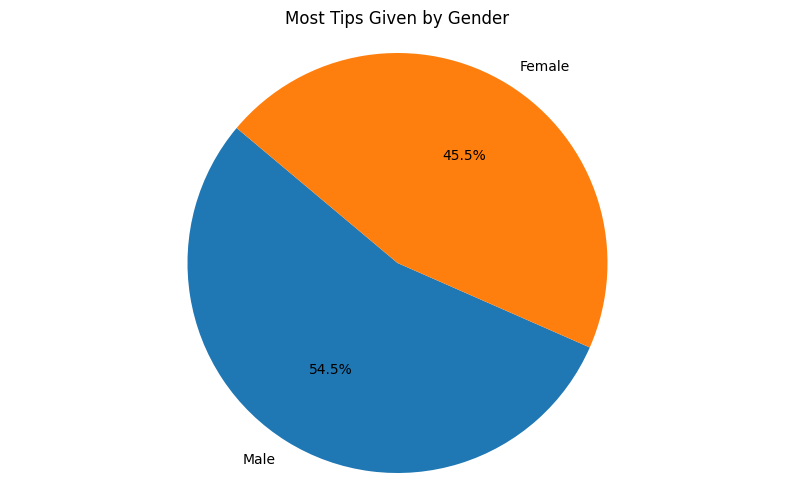

In [ ]:
most_tips_by_gender =data.groupby('Tip_Giver')['Tips'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.pie(most_tips_by_gender, labels=most_tips_by_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Tips Given by Gender')
plt.axis('equal')
plt.show()

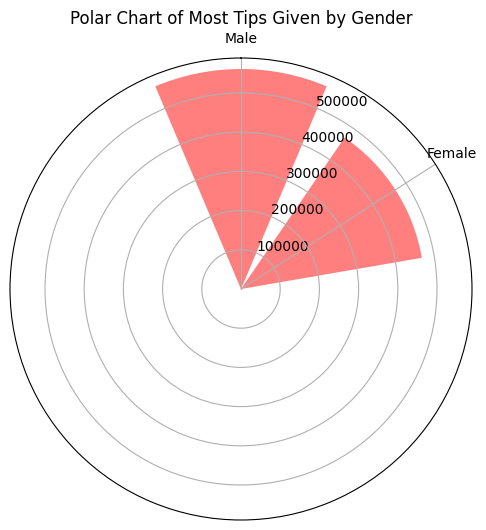

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
r_gender_tips = most_tips_by_gender.values
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.bar(most_tips_by_gender.index, r_gender_tips, color='r', alpha=0.5)
ax.set_title('Polar Chart of Most Tips Given by Gender')
plt.show()